In [3]:
import pandas as pd
data = pd.read_csv("sensor_data_200.txt",delimiter=" ",header=None,names = ("date","time","ir","lidar"))
data

,date,time,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
...,...,...,...,...
58983,20180124,120023,313,208
58984,20180124,120026,297,200
58985,20180124,120030,323,204
58986,20180124,120033,326,207


<function matplotlib.pyplot.show(close=None, block=None)>

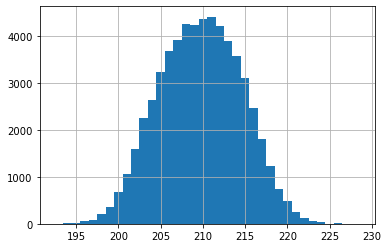

In [7]:
import matplotlib.pyplot as plt
data["lidar"].hist(bins = max(data["lidar"] -min(data["lidar"])),align='left')
plt.show

In [5]:
mean1 = sum(data["lidar"].values)/len(data["lidar"].values)
mean2 = data["lidar"].mean()
print(mean1,mean2)

209.73713297619855 209.73713297619855


<function matplotlib.pyplot.show(close=None, block=None)>

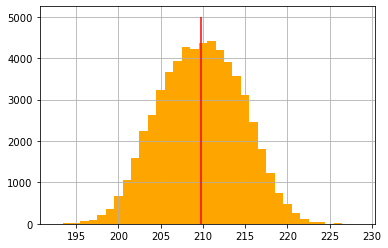

In [9]:
data["lidar"].hist(bins= max(data["lidar"])-min(data["lidar"]),color = "orange",align = 'left')
plt.vlines(mean1,ymin = 0,ymax = 5000,color = "red")
plt.show

In [12]:
#pandasで使用
pandas_sampling_var = data["lidar"].var(ddof = 0) #標本分散
pandas_default_var = data["lidar"].var()          #不偏分散

print(pandas_sampling_var)
print(pandas_default_var)


23.407709770274106
23.40810659855441


In [13]:
#pandasを使用して標準偏差を求める
pandas_stddev = data["lidar"].std()
print(pandas_stddev)

4.83819249292072


In [14]:
freqs = pd.DataFrame(data["lidar"].value_counts())
freqs.transpose() #横向きに出力するためのもの

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409,4355,4261,4228,4201,3920,3897,3674,3572,3225,...,84,59,55,32,15,13,10,4,3,1


In [19]:
#各センサ値の頻度を数えてデータフレームにする
freqs = pd.DataFrame(data["lidar"].value_counts())
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409,4355,4261,4228,4201,3920,3897,3674,3572,3225,...,84,59,55,32,15,13,10,4,3,1


In [29]:
#lidar列に入っているそれぞれの頻度をdataの要素数で割る
freqs["probs"] = freqs["lidar"]/len(data["lidar"])
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409.000000,4355.000000,4261.000000,4228.000000,4201.000000,3920.000000,3897.000000,3674.000000,3572.000000,3225.000000,...,84.000000,59.000,55.000000,32.000000,15.000000,13.00000,10.00000,4.000000,3.000000,1.000000
probs,0.074744,0.073829,0.072235,0.071676,0.071218,0.066454,0.066064,0.062284,0.060555,0.054672,...,0.001424,0.001,0.000932,0.000542,0.000254,0.00022,0.00017,0.000068,0.000051,0.000017


In [33]:
sum(freqs["probs"])

1.0

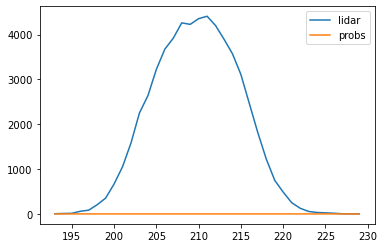

In [36]:
freqs.sort_index().plot()
plt.show()

In [45]:
#freqs.sampleのnは選ぶ個数、probsの中に選ぶ際の確率が入ってることを指定する
def drawing():
    return freqs.sample(n=1,weights="probs").index[0]

drawing()

213

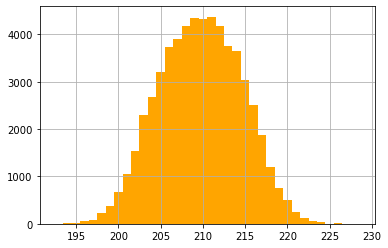

In [50]:
samples = [drawing() for i in range(len(data))]
simulated = pd.DataFrame(samples,columns = ["lidar"])
p = simulated["lidar"]
p.hist(bins = max(p) - min(p),color = "orange",align = "left")
plt.show()

In [51]:
def p(z,mu = 209.7,dev =23.4):
    return math.exp(-(z-mu)**2/(2*dev))/math.sqrt(2*math.pi*dev)

In [53]:
zs = range(190,230)
ys = [p(z) for z in zs]

plt.plot(zs,ys)
plt.show()

NameError: name 'math' is not defined